### aim: 

### date: 

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [3]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr
import sys
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE')
#list of models
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/UTILS')
import lom
import utils as ut

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import time
plt.rcParams.update({'font.size': 12})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 12}

plt.rc('font', **font)

In [4]:
%matplotlib inline
import sys
sys.path.append('/gpfs/home/mep22dku/scratch/NEMO-related/')
from pyCDFTOOLS.cdfmocsig import *

import matplotlib.pyplot as plt
# from matplotlib_colorbar import *

import numpy as np
import glob
import netCDF4, copy

In [5]:
#ln -s /gpfs/data/greenocean/software/resources/regrid/mesh_mask3_6.nc mesh_mask.nc
# you need kt to loop 0-11
kwargs =  {"kt"     : 0,
           "lprint" : False,
           "lg_vvl" : False,
           "ldec"   : False,
           "leiv"   : False,  "eivv_var" : "voce_eiv",
           "lisodep": False,
           "lntr"   : False,
           "lverb"  : True}



def wrap_cdfmocsig(yr, tdir, tsig = 2000, **kwargs):
    
    fileV = f'ORCA2_1m_{yr}0101_{yr}1231_grid_V.nc'
    fileT = f'ORCA2_1m_{yr}0101_{yr}1231_grid_T.nc'
    bins = sigma_bins(tsig)
    # print('')
    # print('bins')
    # print(bins)#use the 2000 version. maybe look at where the sigma 
    data_dir = f'/gpfs/data/greenocean/software/runs/{tdir}/'
    # for putting extra options in
    #   -- kt       = number for using a specified time entry (python indexing)
    #   -- kz       = number for using a specified vertical level/layer (python indexing)
    #   -- lprint   = True   for printing out variable names in netcdf file
    #   -- lverb    = True   for printing out more information
    #   -- lg_vvl   = True   for using s-coord (time-varying metric)
    #   -- ldec     = True   decompose the MOC into some components
    #   -- leiv     = True   for adding the eddy induced velocity component
    #        eivv_var = string for EIV-v variable name
    #   -- lisodep  = True   (not yet implemented) output zonal averaged isopycnal depth
    #   -- lntr     = True   (not yet implemented) do binning with neutral density


    # generate a field
    sigma, depi, latV, dmoc, opt_dic = cdfmocsig(data_dir, fileV, "vomecrty", fileT, "votemper", "vosaline", bins, **kwargs)
    
    return sigma, depi, latV, dmoc, opt_dic

sigma, depi, latV, dmoc, opt_dic = wrap_cdfmocsig(1950, 'TOM12_TJ_1AA6', **kwargs)

dmoc_0 = np.copy(dmoc)

min density for binning = 30.025
max density for binning = 37.875
slow k loop, progress = 0.00 %...0.32 %...0.65 %...

In [6]:
#ln -s /gpfs/data/greenocean/software/resources/regrid/mesh_mask3_6.nc mesh_mask.nc
# you need kt to loop 0-11
kwargs =  {"kt"     : 6,
           "lprint" : False,
           "lg_vvl" : False,
           "ldec"   : False,
           "leiv"   : False,  "eivv_var" : "voce_eiv",
           "lisodep": False,
           "lntr"   : False,
           "lverb"  : True}



def wrap_cdfmocsig(yr, tdir, tsig = 2000, **kwargs):
    
    fileV = f'ORCA2_1m_{yr}0101_{yr}1231_grid_V.nc'
    fileT = f'ORCA2_1m_{yr}0101_{yr}1231_grid_T.nc'
    bins = sigma_bins(tsig)
    # print('')
    # print('bins')
    # print(bins)#use the 2000 version. maybe look at where the sigma 
    data_dir = f'/gpfs/data/greenocean/software/runs/{tdir}/'
    # for putting extra options in
    #   -- kt       = number for using a specified time entry (python indexing)
    #   -- kz       = number for using a specified vertical level/layer (python indexing)
    #   -- lprint   = True   for printing out variable names in netcdf file
    #   -- lverb    = True   for printing out more information
    #   -- lg_vvl   = True   for using s-coord (time-varying metric)
    #   -- ldec     = True   decompose the MOC into some components
    #   -- leiv     = True   for adding the eddy induced velocity component
    #        eivv_var = string for EIV-v variable name
    #   -- lisodep  = True   (not yet implemented) output zonal averaged isopycnal depth
    #   -- lntr     = True   (not yet implemented) do binning with neutral density


    # generate a field
    sigma, depi, latV, dmoc, opt_dic = cdfmocsig(data_dir, fileV, "vomecrty", fileT, "votemper", "vosaline", bins, **kwargs)
    
    return sigma, depi, latV, dmoc, opt_dic

sigma, depi, latV, dmoc, opt_dic = wrap_cdfmocsig(1950, 'TOM12_TJ_1AA6', **kwargs)

dmoc_6 = np.copy(dmoc)

min density for binning = 30.025
max density for binning = 37.875
slow k loop, progress = 0.00 %...0.32 %...0.65 %...

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


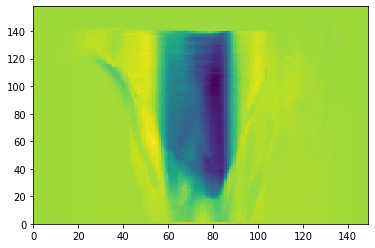

In [7]:
plt.pcolormesh(dmoc_6[0,:,:]-dmoc_0[0,:,:])

In [15]:
print(np.shape(dmoc_6))

(1, 158, 149)


NameError: name 'tfil' is not defined

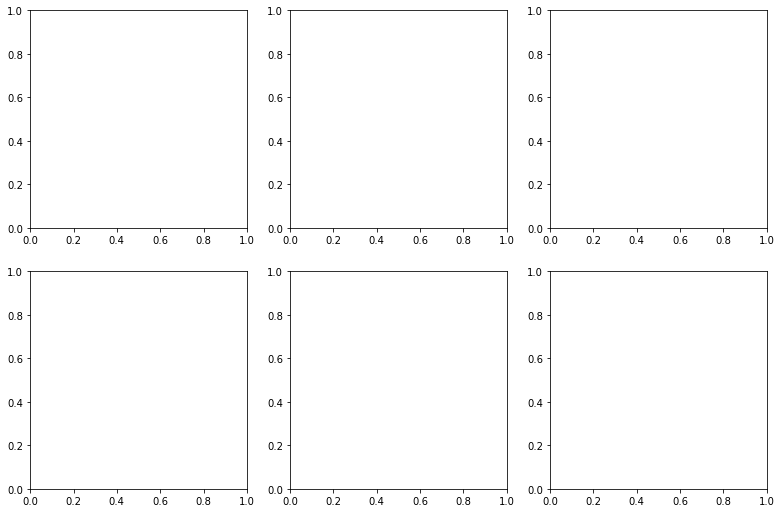

In [8]:
fact = 1.1
fig, axs = plt.subplots(2,3, figsize=(12*fact, 8*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

# w = axs[0].contourf(tfil.nav_lat[:,tx], tfil.deptht, tfil.thetao[0,:,:,tx], np.arange(-2, 20, 1), cmap = 'Spectral', extend = "both")
# plt.colorbar(w, ax = axs[0], label = 'thetao')
# axs[0].invert_yaxis()

In [ ]:
dmoc = np.zeros([12, 158, 149])

In [18]:
def make_nc(name, times, latV, sigma2000, dmoc2000):

    data_vars = {

                 'dmoc2000':(['time_counter', 'sigma2000', 'latV'], dmoc2000,
    {'units': 'Sv',
    'long_name':'sigma-coordinates overturning, ref pressure 2000 dbar'}),
    }

    coords = {'time_counter': (['time_counter'], times),
    'latV': (['latV'],latV),
    'sigma2000': (['sigma2000'], sigma2000),
             }

    attrs = {'made in':'scratch/SOZONE/overturning/sigmaOT_TOM.ipynb',
    'desc': 'concatenate monthly overturning output into yearly and give good dates for later processing'
    }
    savenam = name
    ds = xr.Dataset(data_vars=data_vars,
    coords=coords,
    attrs=attrs)
    ds.to_netcdf(savenam)
    
    return 


def wrap_cdfmocsig(yr, tdir, tsig = 2000, **kwargs):
    
    fileV = f'ORCA2_1m_{yr}0101_{yr}1231_grid_V.nc'
    fileT = f'ORCA2_1m_{yr}0101_{yr}1231_grid_T.nc'
    bins = sigma_bins(tsig)
    # print(bins)#use the 2000 version. maybe look at where the sigma 
    data_dir = f'/gpfs/data/greenocean/software/runs/{tdir}/'
    # for putting extra options in
    #   -- kt       = number for using a specified time entry (python indexing)
    #   -- kz       = number for using a specified vertical level/layer (python indexing)
    #   -- lprint   = True   for printing out variable names in netcdf file
    #   -- lverb    = True   for printing out more information
    #   -- lg_vvl   = True   for using s-coord (time-varying metric)
    #   -- ldec     = True   decompose the MOC into some components
    #   -- leiv     = True   for adding the eddy induced velocity component
    #        eivv_var = string for EIV-v variable name
    #   -- lisodep  = True   (not yet implemented) output zonal averaged isopycnal depth
    #   -- lntr     = True   (not yet implemented) do binning with neutral density


    # generate a field
    sigma, depi, latV, dmoc, opt_dic = cdfmocsig(data_dir, fileV, "vomecrty", fileT, "votemper", "vosaline", bins, **kwargs)
    
    return sigma, depi, latV, dmoc, opt_dic

#sigma, depi, latV, dmoc, opt_dic = wrap_cdfmocsig(1950, 'TOM12_TJ_1AA6', **kwargs)


def get_overturning_TOM(year, run):

    w = time.time()
    tdir = '/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/oceanFields/fullTOM_OT/'
    name1 = f'{run}_{year}_mocsig.nc'
    name = f'{tdir}{name1}'
    print(name)
    
    dmoc_stor = np.zeros([12, 158, 149])
    times = pd.date_range(f"{year}/01/01",f"{year+1}/01/01",freq='MS',closed='left')

    
    for i in range(0,12):

        kwargs =  {"kt"     : i,
                   "lprint" : False,
                   "lg_vvl" : False,
                   "ldec"   : False,
                   "leiv"   : False,  "eivv_var" : "voce_eiv",
                   "lisodep": False,
                   "lntr"   : False,
                   "lverb"  : True}
        
        sigma, depi, latV, dmoc, opt_dic = wrap_cdfmocsig(year, run, **kwargs)
        dmoc_stor[i,:,:] = dmoc

    make_nc(name, times, latV, sigma, dmoc_stor)
    
    w2 = time.time()
    print(w2-w)
    
    return
        
get_overturning_TOM(1950, 'TOM12_TJ_1AA6')        

/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/oceanFields/fullTOM_OT/TOM12_TJ_1AA6_1950_mocsig.nc
min density for binning = 30.025
max density for binning = 37.875
slow k loop, progress = 0.00 %...0.32 %...0.65 %...min density for binning = 30.025
max density for binning = 37.875
slow k loop, progress = 0.00 %...0.32 %...0.65 %...min density for binning = 30.025
max density for binning = 37.875
slow k loop, progress = 0.00 %...0.32 %...0.65 %...min density for binning = 30.025
max density for binning = 37.875
slow k loop, progress = 0.00 %...0.32 %...0.65 %...min density for binning = 30.025
max density for binning = 37.875
slow k loop, progress = 0.00 %...0.32 %...0.65 %...min density for binning = 30.025
max density for binning = 37.875
slow k loop, progress = 0.00 %...0.32 %...0.65 %...min density for binning = 30.025
max density for binning = 37.875
slow k loop, progress = 0.00 %...0.32 %...0.65 %...min density for binning = 30.025
max density for binning = 37.875
slow k loop, pro

Text(0.5, 0.98, 'overturning by latitude in sigma2000 coordinates')

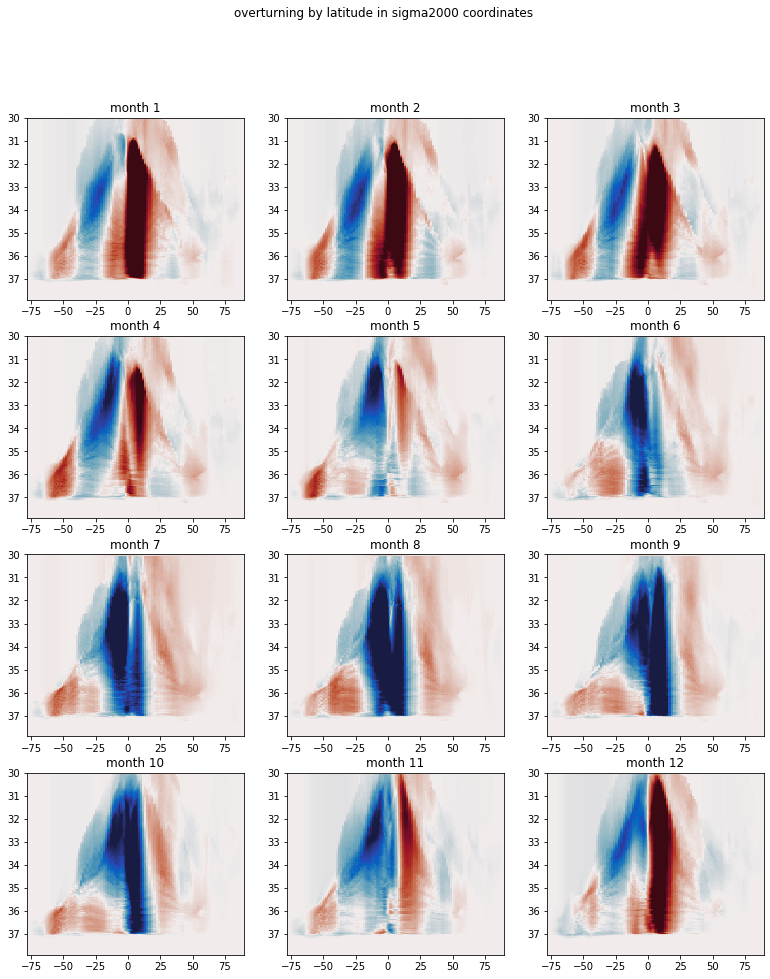

In [29]:
fact = 1.1
fig, axs = plt.subplots(4,3, figsize=(12*fact, 14*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

w = xr.open_dataset('/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/oceanFields/fullTOM_OT/TOM12_TJ_1AA6_1950_mocsig.nc')


for i in range(0,12):
    
    axs[i].pcolormesh(w.latV,w.sigma2000, w.dmoc2000[i,:,:], vmin = -40, vmax = 40, cmap = cm.balance)
    axs[i].invert_yaxis()
    axs[i].set_title(f'month {i+1}')
    
plt.suptitle('overturning by latitude in sigma2000 coordinates')

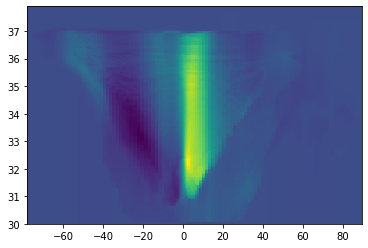

In [23]:
plt.pcolormesh(w.latV,w.sigma2000, w.dmoc2000[0,:,:])